In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [98]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [99]:
dataset = dataset.drop(columns = ['User ID'])

In [100]:
dataset.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [101]:
gender = pd.get_dummies(dataset.Gender)
dataset = pd.concat([gender, dataset], axis = 1)
dataset

,Female,Male,Gender,Age,EstimatedSalary,Purchased
0,0,1,Male,19,19000,0
1,0,1,Male,35,20000,0
2,1,0,Female,26,43000,0
3,1,0,Female,27,57000,0
4,0,1,Male,19,76000,0
...,...,...,...,...,...,...
395,1,0,Female,46,41000,1
396,0,1,Male,51,23000,1
397,1,0,Female,50,20000,1
398,0,1,Male,36,33000,0


In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[['Age','EstimatedSalary']] = scaler.fit_transform(dataset[['Age','EstimatedSalary']])
dataset.head

<bound method NDFrame.head of      Female  Male  Gender       Age  EstimatedSalary  Purchased
0         0     1    Male  0.023810         0.029630          0
1         0     1    Male  0.404762         0.037037          0
2         1     0  Female  0.190476         0.207407          0
3         1     0  Female  0.214286         0.311111          0
4         0     1    Male  0.023810         0.451852          0
..      ...   ...     ...       ...              ...        ...
395       1     0  Female  0.666667         0.192593          1
396       0     1    Male  0.785714         0.059259          1
397       1     0  Female  0.761905         0.037037          1
398       0     1    Male  0.428571         0.133333          0
399       1     0  Female  0.738095         0.155556          1

[400 rows x 6 columns]>

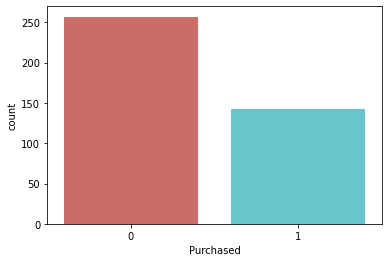

In [103]:
dataset.Purchased.value_counts()
sns.countplot(x = 'Purchased', data = dataset, palette = 'hls')
plt.show()

In [104]:
X = dataset[['Female','Male', 'Age', 'EstimatedSalary']]
Y = dataset[['Purchased']]

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [106]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
Y_pred = logreg.predict(X_test)

In [108]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[76,  3],
       [17, 24]])

In [111]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred) * 100)
print("Precision:",metrics.precision_score(Y_test, Y_pred) * 100)
print("Recall:",metrics.recall_score(Y_test, Y_pred) * 100)

Accuracy: 83.33333333333334
Precision: 88.88888888888889
Recall: 58.536585365853654
